In [1]:
import numpy as np
import pandas as pd
from io import StringIO

## Simple Example

In [2]:
# Example data from the lesson
df = pd.read_csv(StringIO('''
yesterday,temp,today
no rain,80,rain
no rain,80,rain
no rain,80,no rain
rain,81,rain
rain,81,rain
rain,83,rain
rain,86,no rain
no rain,89,rain
rain,89,rain
no rain,89,no rain'''))

In [3]:
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text

X, y = df[['temp']], df.today

tree = DecisionTreeClassifier()
tree.fit(X, y)

DecisionTreeClassifier()

In [8]:
# how well does our model perform? 80% accuracy
tree.score(X,y)

0.8

In [11]:
print(export_text(tree))

|--- feature_0 <= 84.50
|   |--- feature_0 <= 80.50
|   |   |--- class: rain
|   |--- feature_0 >  80.50
|   |   |--- class: rain
|--- feature_0 >  84.50
|   |--- feature_0 <= 87.50
|   |   |--- class: no rain
|   |--- feature_0 >  87.50
|   |   |--- class: rain



In [9]:
# what if we want column/split names??
print(export_text(tree, feature_names=X.columns.tolist()))

|--- temp <= 84.50
|   |--- temp <= 80.50
|   |   |--- class: rain
|   |--- temp >  80.50
|   |   |--- class: rain
|--- temp >  84.50
|   |--- temp <= 87.50
|   |   |--- class: no rain
|   |--- temp >  87.50
|   |   |--- class: rain



In [13]:
# I think this shows how many in each bin???
print(export_text(tree, feature_names=X.columns.tolist(), show_weights=True))

|--- temp <= 84.50
|   |--- temp <= 80.50
|   |   |--- weights: [1.00, 2.00] class: rain
|   |--- temp >  80.50
|   |   |--- weights: [0.00, 3.00] class: rain
|--- temp >  84.50
|   |--- temp <= 87.50
|   |   |--- weights: [1.00, 0.00] class: no rain
|   |--- temp >  87.50
|   |   |--- weights: [1.00, 2.00] class: rain



[Text(167.4, 181.2, 'X[0] <= 84.5\ngini = 0.42\nsamples = 10\nvalue = [3, 7]'),
 Text(83.7, 108.72, 'X[0] <= 80.5\ngini = 0.278\nsamples = 6\nvalue = [1, 5]'),
 Text(41.85, 36.23999999999998, 'gini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(125.55000000000001, 36.23999999999998, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(251.10000000000002, 108.72, 'X[0] <= 87.5\ngini = 0.5\nsamples = 4\nvalue = [2, 2]'),
 Text(209.25, 36.23999999999998, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(292.95, 36.23999999999998, 'gini = 0.444\nsamples = 3\nvalue = [1, 2]')]

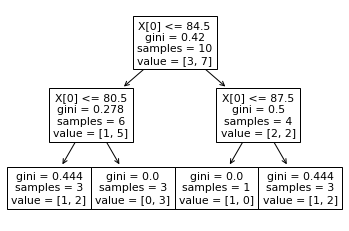

In [6]:
plot_tree(tree)

[Text(167.4, 181.2, 'temp <= 84.5\ngini = 0.42\nsamples = 10\nvalue = [3, 7]\nclass = rain'),
 Text(83.7, 108.72, 'temp <= 80.5\ngini = 0.278\nsamples = 6\nvalue = [1, 5]\nclass = rain'),
 Text(41.85, 36.23999999999998, 'gini = 0.444\nsamples = 3\nvalue = [1, 2]\nclass = rain'),
 Text(125.55000000000001, 36.23999999999998, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]\nclass = rain'),
 Text(251.10000000000002, 108.72, 'temp <= 87.5\ngini = 0.5\nsamples = 4\nvalue = [2, 2]\nclass = no rain'),
 Text(209.25, 36.23999999999998, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = no rain'),
 Text(292.95, 36.23999999999998, 'gini = 0.444\nsamples = 3\nvalue = [1, 2]\nclass = rain')]

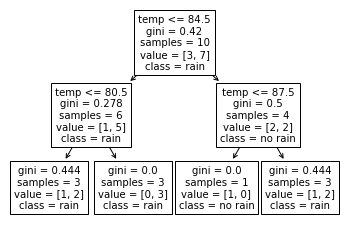

In [14]:
# make it more user friendly
plot_tree(tree, feature_names=X.columns.tolist(), class_names=sorted(y.unique()))

## Titanic Example

In [15]:
import acquire
import prepare

train, validate, test = prepare.prep_titanic(acquire.get_titanic_data())
train.head()

/Users/thxmanu/codeup-data-science/classification-exercises/prepare.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['age'] = imputer.transform(test[['age']])


,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,embark_town,alone,Q,S
734,734,0,2,male,23.000000,0,0,13.0000,S,Second,Southampton,1,0,1
93,93,0,3,male,26.000000,1,2,20.5750,S,Third,Southampton,0,0,1
64,64,0,1,male,30.750423,0,0,27.7208,C,First,Cherbourg,1,0,0
809,809,1,1,female,33.000000,1,0,53.1000,S,First,Southampton,0,0,1
571,571,1,1,female,53.000000,2,0,51.4792,S,First,Southampton,0,0,1


In [16]:
X_cols = ['pclass', 'alone', 'Q', 'S']
y_col = 'survived'

X_train, y_train = train[X_cols], train[y_col]
X_validate, y_validate = validate[X_cols], validate[y_col]
X_test, y_test = test[X_cols], test[y_col]

In [18]:
model1 = DecisionTreeClassifier()
model1.fit(X_train, y_train)

print(f'training score: {model1.score(X_train, y_train):.2%}')
print(f'validate score: {model1.score(X_validate, y_validate):.2%}')

training score: 73.04%
validate score: 66.36%


[Text(777.2142857142858, 597.96, 'pclass <= 2.5\ngini = 0.472\nsamples = 497\nvalue = [307, 190]\nclass = died'),
 Text(430.45714285714286, 489.24, 'alone <= 0.5\ngini = 0.492\nsamples = 234\nvalue = [102, 132]\nclass = survived'),
 Text(239.14285714285714, 380.52000000000004, 'S <= 0.5\ngini = 0.408\nsamples = 112\nvalue = [32, 80]\nclass = survived'),
 Text(143.4857142857143, 271.8, 'Q <= 0.5\ngini = 0.36\nsamples = 34\nvalue = [8, 26]\nclass = survived'),
 Text(95.65714285714286, 163.07999999999998, 'pclass <= 1.5\ngini = 0.367\nsamples = 33\nvalue = [8, 25]\nclass = survived'),
 Text(47.82857142857143, 54.360000000000014, 'gini = 0.384\nsamples = 27\nvalue = [7, 20]\nclass = survived'),
 Text(143.4857142857143, 54.360000000000014, 'gini = 0.278\nsamples = 6\nvalue = [1, 5]\nclass = survived'),
 Text(191.31428571428572, 163.07999999999998, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = survived'),
 Text(334.8, 271.8, 'pclass <= 1.5\ngini = 0.426\nsamples = 78\nvalue = [24, 54]\nc

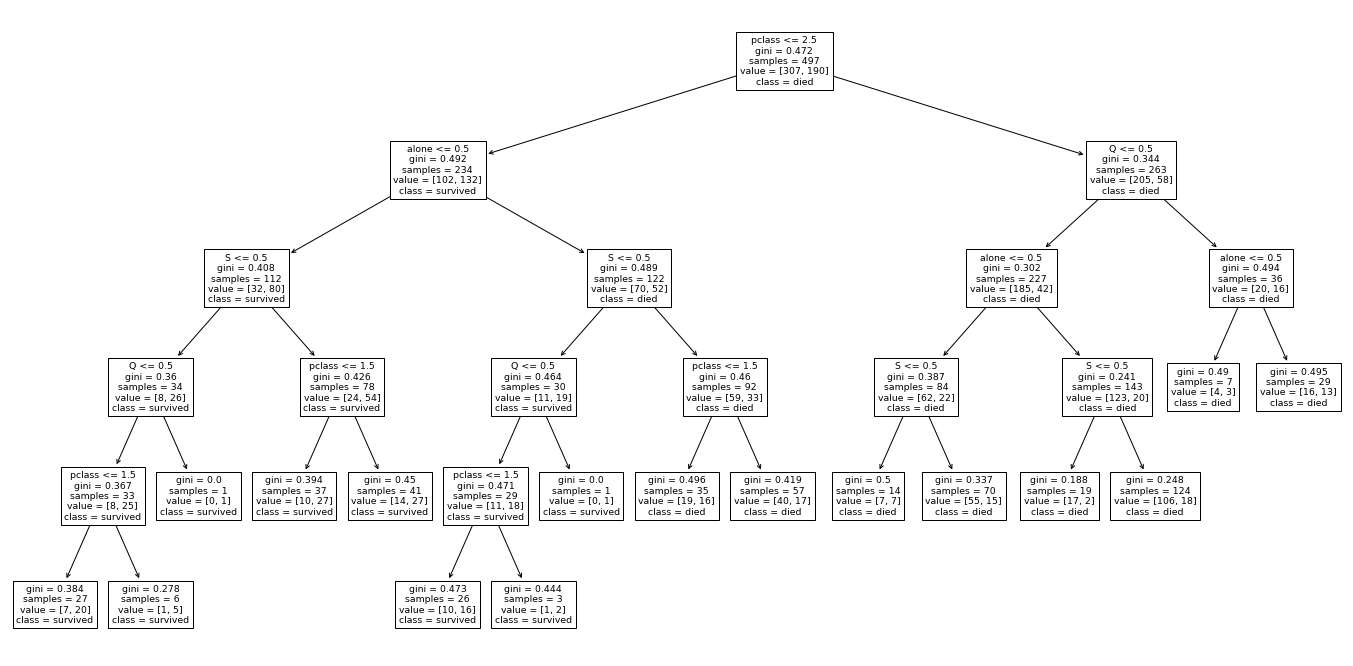

In [23]:
# TODO: interpret + visualize model
import matplotlib.pyplot as plt
plt.figure(figsize=(24,12))

plot_tree(model1, feature_names=X_train.columns.tolist(), class_names=['died', 'survived'])

In [25]:
print(export_text(model1, feature_names=X_train.columns.tolist(), show_weights=True))

|--- pclass <= 2.50
|   |--- alone <= 0.50
|   |   |--- S <= 0.50
|   |   |   |--- Q <= 0.50
|   |   |   |   |--- pclass <= 1.50
|   |   |   |   |   |--- weights: [7.00, 20.00] class: 1
|   |   |   |   |--- pclass >  1.50
|   |   |   |   |   |--- weights: [1.00, 5.00] class: 1
|   |   |   |--- Q >  0.50
|   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |--- S >  0.50
|   |   |   |--- pclass <= 1.50
|   |   |   |   |--- weights: [10.00, 27.00] class: 1
|   |   |   |--- pclass >  1.50
|   |   |   |   |--- weights: [14.00, 27.00] class: 1
|   |--- alone >  0.50
|   |   |--- S <= 0.50
|   |   |   |--- Q <= 0.50
|   |   |   |   |--- pclass <= 1.50
|   |   |   |   |   |--- weights: [10.00, 16.00] class: 1
|   |   |   |   |--- pclass >  1.50
|   |   |   |   |   |--- weights: [1.00, 2.00] class: 1
|   |   |   |--- Q >  0.50
|   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |--- S >  0.50
|   |   |   |--- pclass <= 1.50
|   |   |   |   |--- weights: [19.00, 16.00] class: 0
|

In [38]:
# what is important?
# index=feature name, values are importance of feature based on this model

pd.Series(dict(zip(X_train.columns, model1.feature_importances_)))

pclass    0.587926
alone     0.216390
Q         0.087824
S         0.107860
dtype: float64

In [32]:
# TODO: create additional models

In [33]:
# let's tighten up the decision tree...
model2 = DecisionTreeClassifier(max_depth=3)
model2.fit(X_train, y_train)

print(f'training score: {model1.score(X_train, y_train):.2%}')
print(f'validate score: {model1.score(X_validate, y_validate):.2%}')


training score: 73.04%
validate score: 66.36%


[Text(167.4, 190.26, 'pclass <= 2.5\ngini = 0.472\nsamples = 497\nvalue = [307, 190]\nclass = died'),
 Text(83.7, 135.9, 'alone <= 0.5\ngini = 0.492\nsamples = 234\nvalue = [102, 132]\nclass = survived'),
 Text(41.85, 81.53999999999999, 'S <= 0.5\ngini = 0.408\nsamples = 112\nvalue = [32, 80]\nclass = survived'),
 Text(20.925, 27.180000000000007, 'gini = 0.36\nsamples = 34\nvalue = [8, 26]\nclass = survived'),
 Text(62.775000000000006, 27.180000000000007, 'gini = 0.426\nsamples = 78\nvalue = [24, 54]\nclass = survived'),
 Text(125.55000000000001, 81.53999999999999, 'S <= 0.5\ngini = 0.489\nsamples = 122\nvalue = [70, 52]\nclass = died'),
 Text(104.625, 27.180000000000007, 'gini = 0.464\nsamples = 30\nvalue = [11, 19]\nclass = survived'),
 Text(146.475, 27.180000000000007, 'gini = 0.46\nsamples = 92\nvalue = [59, 33]\nclass = died'),
 Text(251.10000000000002, 135.9, 'Q <= 0.5\ngini = 0.344\nsamples = 263\nvalue = [205, 58]\nclass = died'),
 Text(209.25, 81.53999999999999, 'alone <= 0.5\

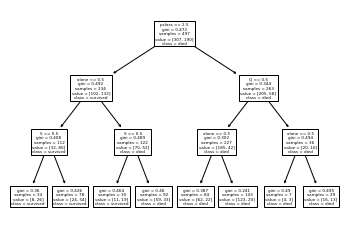

In [34]:
plot_tree(model2, feature_names=X_train.columns.tolist(), class_names=['died', 'survived'])

In [39]:
# what is important?
# index=feature name, values are importance of feature based on this model

pd.Series(dict(zip(X_train.columns, model2.feature_importances_)))

pclass    0.604645
alone     0.233129
Q         0.086505
S         0.075721
dtype: float64

In [35]:
model3 = DecisionTreeClassifier(max_leaf_nodes=6)
model3.fit(X_train, y_train)

print(f'training score: {model1.score(X_train, y_train):.2%}')
print(f'validate score: {model1.score(X_validate, y_validate):.2%}')

training score: 73.04%
validate score: 66.36%


[Text(167.40000000000003, 190.26, 'pclass <= 2.5\ngini = 0.472\nsamples = 497\nvalue = [307, 190]\nclass = died'),
 Text(66.96000000000001, 135.9, 'alone <= 0.5\ngini = 0.492\nsamples = 234\nvalue = [102, 132]\nclass = survived'),
 Text(33.480000000000004, 81.53999999999999, 'gini = 0.408\nsamples = 112\nvalue = [32, 80]\nclass = survived'),
 Text(100.44000000000001, 81.53999999999999, 'S <= 0.5\ngini = 0.489\nsamples = 122\nvalue = [70, 52]\nclass = died'),
 Text(66.96000000000001, 27.180000000000007, 'gini = 0.464\nsamples = 30\nvalue = [11, 19]\nclass = survived'),
 Text(133.92000000000002, 27.180000000000007, 'gini = 0.46\nsamples = 92\nvalue = [59, 33]\nclass = died'),
 Text(267.84000000000003, 135.9, 'Q <= 0.5\ngini = 0.344\nsamples = 263\nvalue = [205, 58]\nclass = died'),
 Text(234.36, 81.53999999999999, 'alone <= 0.5\ngini = 0.302\nsamples = 227\nvalue = [185, 42]\nclass = died'),
 Text(200.88000000000002, 27.180000000000007, 'gini = 0.387\nsamples = 84\nvalue = [62, 22]\nclas

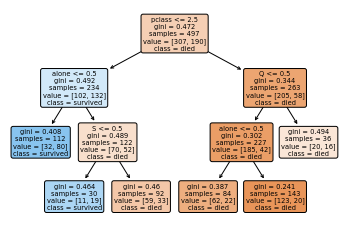

In [44]:
plot_tree(model3, feature_names=X_train.columns.tolist(), class_names=['died', 'survived'], filled=True, rounded=True)

In [40]:
# what is important?
# index=feature name, values are importance of feature based on this model

pd.Series(dict(zip(X_train.columns, model3.feature_importances_)))

pclass    0.607821
alone     0.234262
Q         0.086959
S         0.070958
dtype: float64

<AxesSubplot:ylabel='Feature Importance'>

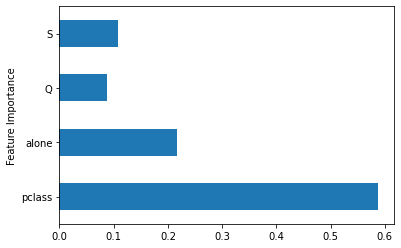

In [42]:
# what is important?
# index=feature name, values are importance of feature based on this model

pd.Series(dict(zip(X_train.columns, model1.feature_importances_))).plot.barh(xlabel='Feature Importance')

## Recap

Decision Trees in the modeling loop

1. Create the model (setting hyperparameters)
2. Fit the object on the training data (sklearn does the math)
3. Interpret/use the model (evaluate it's performance and see how it works)